# Plotting rasters and shapefiles
---
By Dalpiaz G and Tubini N., under the CC4 license.

---

This Notebook uses the collections of functions in **plotMaps.py**

Colormaps in plots can be chosen from the list present in: [Colormaps Documentation](https://matplotlib.org/users/colormaps.html)

In [1]:
%%capture
%run plotMaps.py

In [2]:
import os
import numpy as np
import rasterio
import rasterio.plot as rsplot
import matplotlib.pyplot as plt

import shapefile as shp

from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import pandas as pd
import datetime as datetime

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
os.chdir("../output")

In [4]:
maps_folder_path = os.getcwd()
#os.listdir(os.getcwd())

#### Load raster files as rasters

In [5]:
dem = rasterio.open("DEM_pitfiller.tif")
aspect = rasterio.open("aspect.tif")
network = rasterio.open("network_2000.tif")
draindir = rasterio.open("drain_dir.tif")

#### Load raster files as numpy.array (to plot singularly with a colorbar)

In [6]:
aspect_array = openRasterAsNpArray("aspect.tif",-9999)
network_array = openRasterAsNpArray("network_2000.tif",-9999)
dem_array = openRasterAsNpArray("DEM_pitfiller.tif",-9999)
draindir_array = openRasterAsNpArray("drain_dir.tif",-999)

C:\Users\Niccolo\OMS\OMS_HortonMachine\docs\plotMaps.py:58: RuntimeWarning: invalid value encountered in less_equal
  rasterMap[rasterMap <= noValue]='NAN'


#### Loading shapefiles

In [7]:
shapefile_name ='cutout_network_2000.shp'
shapefile_network = os.path.join(maps_folder_path, shapefile_name)
network = gpd.GeoDataFrame.from_file(shapefile_network)

***
## **Plots**

### Single raster (with colorbar):
The single raster is given in input as numpy array.
Its colorbar is displayed.

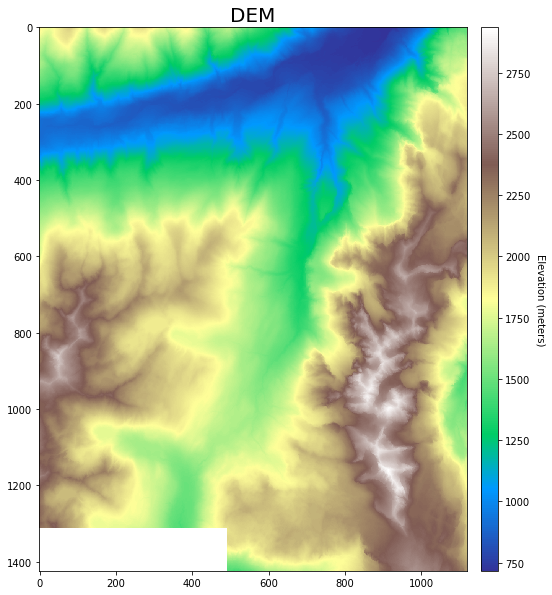

In [9]:
colormap="terrain";
title="DEM";
bartitle="Elevation (meters)";

plotRaster(dem_array, colormap, title, bartitle)

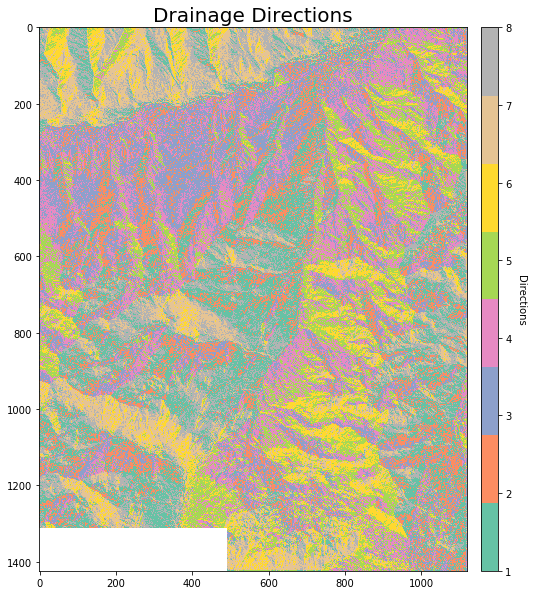

In [11]:
colormap="Set2";
title="Drainage Directions";
bartitle="Directions";

plotRaster(draindir_array, colormap, title, bartitle)

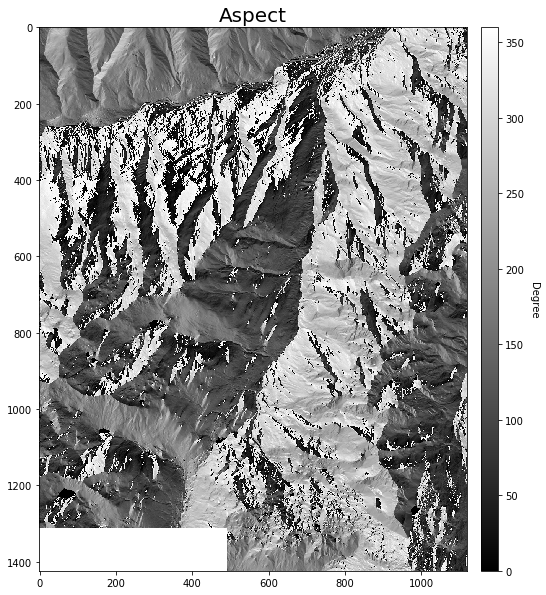

In [10]:
colormap="gist_gray";
title="Aspect";
bartitle="Degree";

plotRaster(aspect_array, colormap, title, bartitle)

***
### General number of layers: both rasters and shapefiles 

A general number of rasters and shapefiles is displayed on a unique map. Rasters are given in input as rasters and not as numpy.array.
Seven inputs are necessary:
- list of rasters to plot
- list of colormaps
- list of transparencies
- list of shapefiles to plot
- list of line colors
- list od labels (for the legend)

In [12]:
RasterList = [dem, aspect];   # list of rasters
ColormapList = ["terrain","gist_gray"] # list of color maps
Alpha = [0.8, 0.2]     # list of transparencies

ShpList = [network]; # list of shapefile
ShpColors = ["red"] # list of color (for rhe lines)
labels = ["Network"] # list of labels (for legend)

title = "Meledrio Basin";

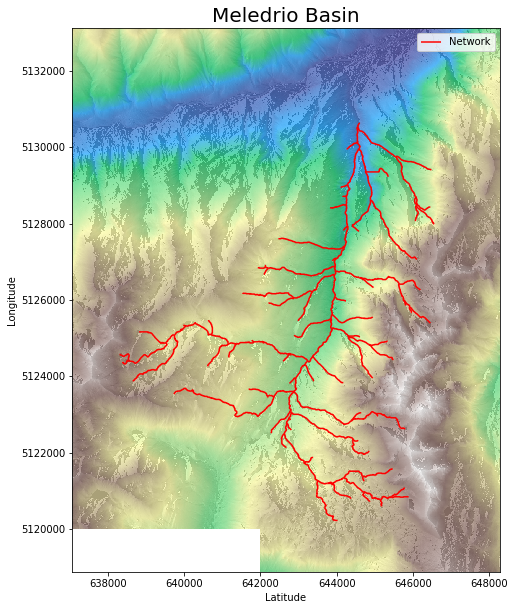

In [13]:
plotMap(RasterList, ColormapList, Alpha, ShpList, ShpColors, labels, title);